<h2><b>DCGAN - Deep Convolutional GAN</b>

In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

<h2><b>Loading and Prrocessing Dataset

The left side of the assignment destructures the returned tuples from load_data().X_train: This is the training dataset containing the images of the handwritten digits. It will be a NumPy array of shape (60000, 28, 28) where 60,000 is the number of training samples, and 28x28 is the resolution of each image. y_train: This is the training labels corresponding to X_train. It contains the digit labels (0-9) for each image, with shape (60000). (,): This part is used to ignore the test data. The underscore () is a convention to signify that the value is being ignored. So, you're not storing X_test and y_test in this case


In [ ]:
(X_train,y_train),(_, _)=tf.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

9


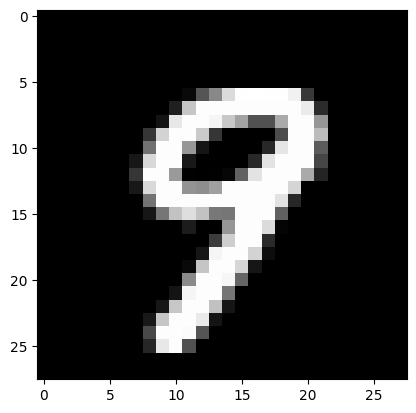

In [ ]:
i=np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray');

Converting data into float format

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

Normalization

In [ ]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [ ]:
X_train=(X_train -127.5)/127.5

In [ ]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
buffer_size=60000
batch_size=256

In [ ]:
buffer_size/batch_size

234.375

In [ ]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

This code transforms X_train (which is typically a large dataset) into a tf.data.Dataset object, shuffles the data with a buffer size of buffer_size, and groups it into batches of size batch_size for efficient training. This is a typical preprocessing step before feeding data into a TensorFlow model.

In [ ]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

Generator

In [ ]:
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers. Dense (units = 7*7*256, use_bias= False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers. LeakyReLU())

  network.add(layers. Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters=128, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters=1, kernel_size = (5,5), padding='same', strides=(2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network


In [ ]:
generator=build_generator()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 14, 14, 128)         │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_10                  │ (None, 28, 28, 64)          │         204,800 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_11                  │ (None, 56, 56, 1)           │           1,601 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,945 (8.89 MB)

 Trainable params: 2,305,473 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [ ]:
generator.input

ValueError: The layer sequential_3 has never been called and thus has no defined input.

In [ ]:
noise=tf.random.normal([1,100])

In [ ]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.02404485,  0.3552964 ,  1.4729487 ,  0.28764567, -0.1737204 ,
        -0.8629257 , -0.5693673 , -0.5891936 , -0.6996878 , -2.0032    ,
        -0.49709493, -0.7972551 , -3.0853817 ,  1.3211683 ,  0.1502596 ,
        -1.107669  ,  0.08949266,  1.1418421 , -2.2014031 ,  0.8649163 ,
        -1.7993524 , -0.76842606,  0.18581893, -0.24705881, -0.16489099,
         0.40117672, -1.3780352 ,  0.15046671, -0.41710532, -1.8198049 ,
        -0.25163865,  1.4393859 , -0.33002695, -1.7368695 , -0.17898306,
        -0.21524906,  0.5881361 , -1.3764629 ,  0.17568089, -1.1958585 ,
        -0.70088136, -0.06143533,  0.1621732 ,  0.8621245 ,  0.68134403,
        -0.5588879 , -0.13209626,  0.21209858, -0.938528  ,  1.7339666 ,
        -1.5088606 ,  0.36069664,  0.42861998, -0.24811031,  1.6108778 ,
         0.17153415, -0.08415693,  1.9222708 ,  0.12829296,  1.3973839 ,
        -1.9847269 , -0.44203466,  1.4435236 , -0.89368683, -1.5354004 ,
 

In [ ]:
genearted_image=generator(noise,training=False)

In [ ]:
genearted_image.shape

TensorShape([1, 56, 56, 1])

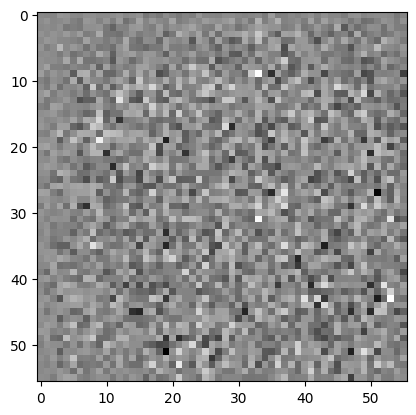

In [ ]:
plt.imshow(genearted_image[0, : ,:,0], cmap='gray');

<h1><b>Building Discriminator


Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d

In [ ]:
def build_discriminator():
    network = tf.keras.Sequential()

    # 14x14x64
    network.add(layers.Conv2D(filters=64, strides=(2,2), kernel_size=(5,5), padding='same', input_shape=[56,56,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7x7x128
    network.add(layers.Conv2D(filters=128, strides=(2,2), kernel_size=(5,5), padding='same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    # Print the model summary
    network.summary()

    return network


In [ ]:
7*7*128

6272

In [ ]:
discriminator=build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,681 (905.00 KB)

 Trainable params: 231,681 (905.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator.input

ValueError: The layer sequential_4 has never been called and thus has no defined input.

In [ ]:
discriminator(genearted_image,training=False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00017603]], dtype=float32)>

In [ ]:
tf.sigmoid(-4.9673054e-05)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4999876>

<b><h3>Error Calculation

Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

This method quantifies how well the discriminator is able to distinguish real images from fakes images. It compares the discriminator predictions on real images with an array of 1s and the discriminator predictions on fake (generated) images with an array of Os.

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
def descriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)

In [ ]:
generator_optimizer =tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer =tf.keras.optimizers.Adam(learning_rate=0.00001)

<h2><b>Training the GAN and Visualization the results

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
epochs=100
noise_dimension=100
number_of_images=16

In [ ]:
batch_size, noise_dimension

(256, 100)

In [ ]:
@tf.function
# This decorator tells Tensorflow to compile the function into a graph,
# which improves performance by optimizing the execution,
# especially on large datasets or when training over many iterations.
def train(images):
    noise = tf.random.normal([batch_size, noise_dimension])
    # print(noise.shape)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # tf.GradientTape(): TensorFlow's GradientTape is used to record operations
        # for automatic differentiation. In this case, two tapes are used to
        # separately track the computations for the generator (gen_tape)
        # and discriminator (disc_tape).

        # This is crucial because both networks need to be trained simultaneously but independently.

        generated_images = generator(noise, training=True)
        # Resize images before feeding them to the discriminator
        images = tf.image.resize(images, [56, 56])
        expected_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss =descriminator_loss(expected_output, fake_output)

        # generator (noise, training=True): The generator takes the random noise
        # as input and produces generated_images. The training=True flag ensures
        # that any training-specific behavior (like dropout) is activated.

        # discriminator(images, training=True): The discriminator takes the real images from the
        # dataset and produces expected_output, which is its prediction about the realness of the images.

        # discriminator(generated_images, training=True): The discriminator also
        # evaluates the generated_images produced by the generator and outputs
        # fake_output, which is its prediction about the realness of the fake images.

        generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        # gen_tape.gradient: Computes the gradients of the gen_loss with respect to
        # the generator's trainable variables (its weights and biases).
        # These gradients will be used to update the generator.

        # disc_tape.gradient: Computes the gradients of the disc_loss with respect
        # to the discriminator's trainable variables.
        # These gradients will be used to update the discriminator.

        generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

        # generator_optimizer.apply_gradients: This applies the computed gradients
        # to update the generator's parameters, using the generator optimizer.

        # The zip(generator_gradients, generator.trainable_variables) pairs each gradient with the corresponding trainable variable.

        # discriminator_optimizer.apply_gradients: Similarly, this updates the discriminator

In [ ]:
test_images=tf.random.normal([number_of_images,noise_dimension])

In [ ]:
test_images.shape

TensorShape([16, 100])

In [ ]:
test_images=tf.random.normal([number_of_images,noise_dimension])

In [ ]:
def train_gan(dataset,epochs,test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)


In [ ]:
train_gan(X_train,epochs,test_images)

dataset: The input dataset used for training, typically a set of images. epochs: The number of training iterations (how many times the model should go through the dataset), test_images: A set of test images used to generate output during the training process for visualizing the progress. Inside the epoch loop, another loop runs through each image_batch in the dataset. train(image_batch): This is a placeholder for the training function that handles training the GAN. After every epoch, it prints the current epoch number. generator(test_images, training=False): This calls the generator model with test_images to generate new images. The argument training=False indicates that the generator is in inference mode, so it won't apply training-related operations like dropout. fig = plt.figure(figsize=(10,10)): Creates a figure for

In [ ]:
def train_gan(dataset, epochs, test_images):
    for epoch in range(epochs):
        # print(epoch)

        for image_batch in dataset:
            # print(image_batch.shape)
            train(image_batch)

        print('Epoch: ', epoch + 1)

        generated_images = generator(test_images, training=False)

        fig = plt.figure(figsize=(10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow((generated_images[i, :, :, 0] * 127.5) + 127.5, cmap='gray')
            plt.axis('off')

        plt.show()